<a href="https://colab.research.google.com/github/lokihaha7/tubes-dti/blob/master/Data-Preproecssing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [99]:
data = pd.read_csv('train_u6lujuX_CVtuZ9i (1).csv')

In [100]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [101]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [102]:
data = data.drop(['Loan_ID'], axis=1)

In [103]:
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mode()[0])

In [104]:
data ['LoanAmount'] = data['LoanAmount'].replace(np.NaN , data['LoanAmount'].mean())
data ['Loan_Amount_Term'] = data['Loan_Amount_Term'].replace(np.NaN , data['Loan_Amount_Term'].mean())

In [105]:
data.dtypes


Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [106]:
g=data.groupby('Property_Area')['Property_Area']

g.count()

Property_Area
Rural        179
Semiurban    233
Urban        202
Name: Property_Area, dtype: int64

In [107]:
data['Gender'] = data['Gender'].map({'Male':1, 'Female':0})
data['Self_Employed'] = data['Self_Employed'].map({'Yes':1, 'No':0})
data['Education'] = data['Education'].map({'Graduate':1, 'Not Graduate':0})
data['Loan_Status'] = data['Loan_Status'].map({'Y':1, 'N':0})
data['Property_Area'] = data['Property_Area'].map({'Rural':1, 'Semiurban':0,'Urban':2})


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb6edd60780>,
      dtype=object)

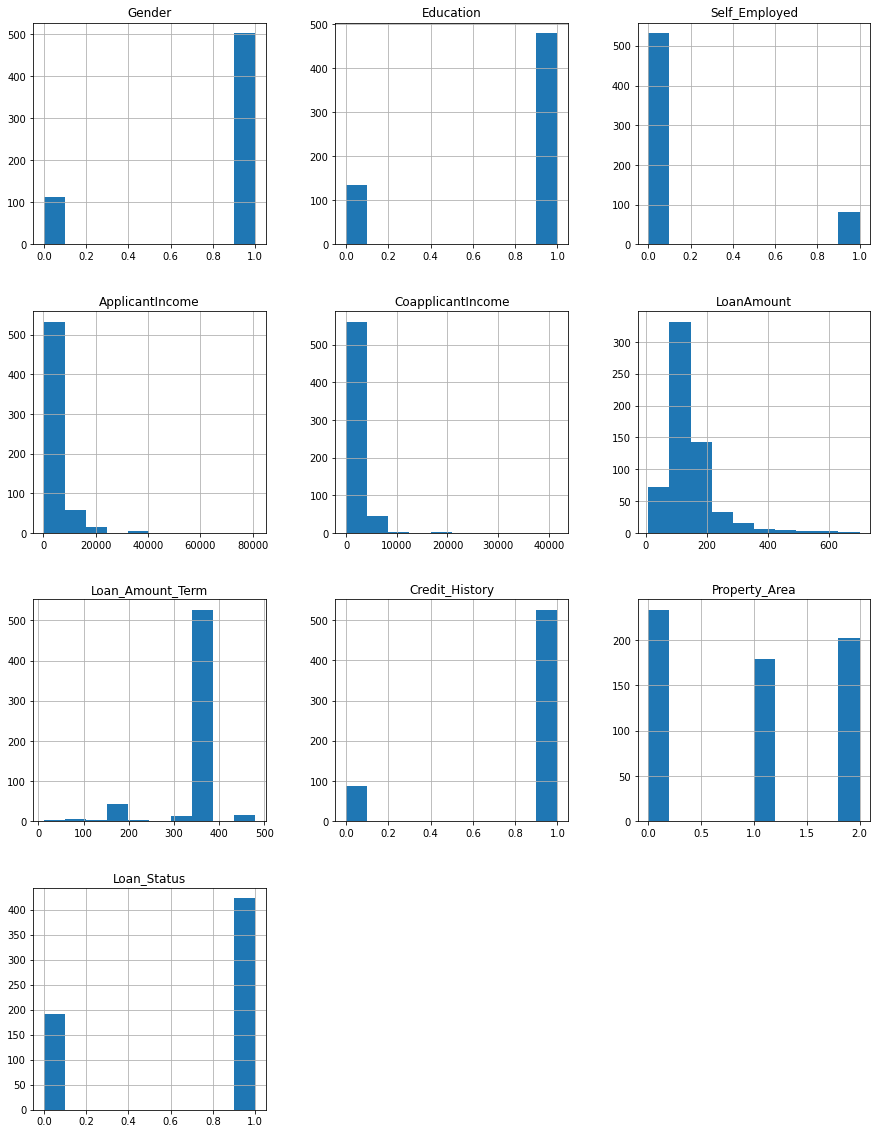

In [108]:
# data.hist()

fig = plt.figure(figsize = (15,20))
ax = fig.gca()
data.hist(ax = ax)

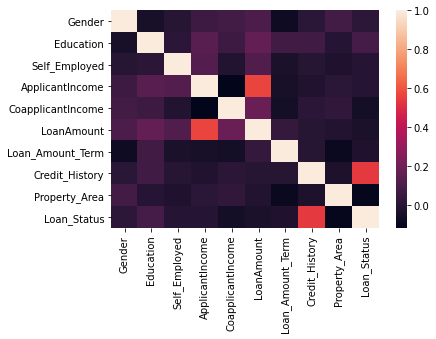

In [109]:
sns.heatmap(data.corr());

In [110]:
data.corr()

,Gender,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,-0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.009170,0.082045,0.017987
Education,-0.045364,1.000000,0.010383,0.140760,0.062290,0.166998,0.077242,0.073658,-0.003592,0.085884
Self_Employed,-0.000525,0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.001550,-0.021996,-0.003700
ApplicantIncome,0.058809,0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.018615,0.007894,-0.004710
CoapplicantIncome,0.082912,0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,0.011134,0.028356,-0.059187
LoanAmount,0.107930,0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.001431,-0.013799,-0.036416
Loan_Amount_Term,-0.073567,0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.000432,-0.089508,-0.020974
Credit_History,0.009170,0.073658,-0.001550,-0.018615,0.011134,-0.001431,0.000432,1.000000,-0.030248,0.540556
Property_Area,0.082045,-0.003592,-0.021996,0.007894,0.028356,-0.013799,-0.089508,-0.030248,1.000000,-0.103253
Loan_Status,0.017987,0.085884,-0.003700,-0.004710,-0.059187,-0.036416,-0.020974,0.540556,-0.103253,1.000000
